In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
all_train_test = [train, test]

### Analyse the Data

In [3]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.tail(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [6]:
categorical_cols = [col for col in train.columns
                   if (train[col].dtype == 'object' or train[col].dtype == 'int64') and
                   train[col].nunique() < 10]
categorical_cols

['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

In [7]:
# How many passengers survived according to Pclass?
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# How many passengers survived according to Age?
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
# How many passengers survived according to SibSp
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [10]:
# How many passengers survived according to ParCh
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [11]:
# How many passengers survived according to place of embarkment?
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


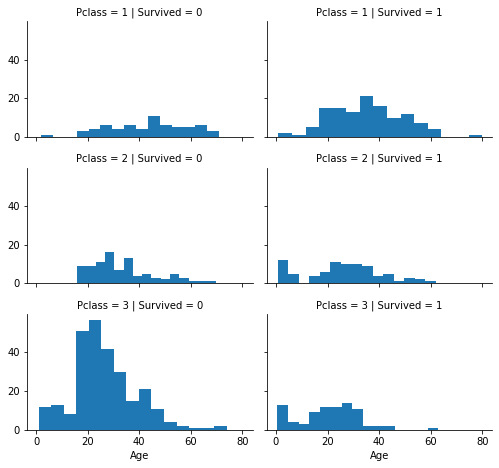

In [12]:
pclass_age_grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
pclass_age_grid.map(plt.hist, 'Age', bins=15)

C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


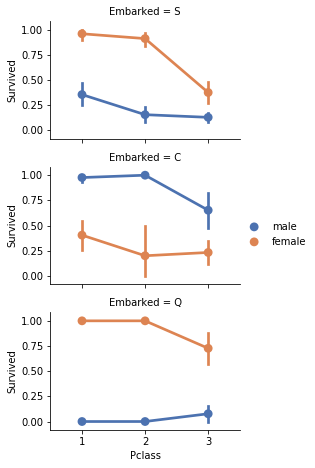

In [13]:
line_plt = sns.FacetGrid(train, size=2.2, row='Embarked', aspect=1.6)
line_plt.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
line_plt.add_legend()

C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


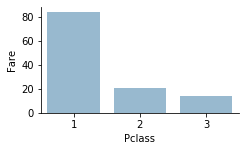

In [14]:
fare_pclass_grid = sns.FacetGrid(train, size=2.2, aspect=1.6)
fare_pclass_grid.map(sns.barplot, 'Pclass', 'Fare', alpha=.5, ci=None)

# Since there is a linear correlation between the fare and the Pclass, we can discard the fare

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Handle missing values of relevant columns

In [16]:
train['Title'] = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [17]:
test['Title'] = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)
pd.crosstab(test['Title'], test['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [18]:
# Combine redundant titles
train['Title'] = train['Title'].replace(['Ms'], 'Miss')
test['Title'] = test['Title'].replace(['Ms'], 'Miss')


In [19]:
# Handle missing Age values in train
mean_age_per_title = train[['Title', 'Age']].groupby(['Title'], as_index=False).mean().round(1)

In [20]:
dict_age_per_title = mean_age_per_title.to_dict('index')
dict_age_per_title

{0: {'Title': 'Capt', 'Age': 70.0},
 1: {'Title': 'Col', 'Age': 58.0},
 2: {'Title': 'Countess', 'Age': 33.0},
 3: {'Title': 'Don', 'Age': 40.0},
 4: {'Title': 'Dr', 'Age': 42.0},
 5: {'Title': 'Jonkheer', 'Age': 38.0},
 6: {'Title': 'Lady', 'Age': 48.0},
 7: {'Title': 'Major', 'Age': 48.5},
 8: {'Title': 'Master', 'Age': 4.6},
 9: {'Title': 'Miss', 'Age': 21.8},
 10: {'Title': 'Mlle', 'Age': 24.0},
 11: {'Title': 'Mme', 'Age': 24.0},
 12: {'Title': 'Mr', 'Age': 32.4},
 13: {'Title': 'Mrs', 'Age': 35.9},
 14: {'Title': 'Rev', 'Age': 43.2},
 15: {'Title': 'Sir', 'Age': 49.0}}

In [21]:
train[train['Title'] == 'Mr'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr


In [22]:

for rec in range(0,len(dict_age_per_title.keys())):
    train.loc[train['Title'] == dict_age_per_title[rec]['Title'], 'Age'] = train.loc[train['Title'] == dict_age_per_title[rec]['Title'], 'Age'].fillna(dict_age_per_title[rec]['Age'])

train[train['Title'] == 'Mr'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,32.4,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,Mr


In [23]:
# Handle missing Age values in test
mean_age_per_title = test[['Title', 'Age']].groupby(['Title'], as_index=False).mean().round(1)

In [24]:
dict_age_per_title = mean_age_per_title.to_dict('index')
dict_age_per_title

{0: {'Title': 'Col', 'Age': 50.0},
 1: {'Title': 'Dona', 'Age': 39.0},
 2: {'Title': 'Dr', 'Age': 53.0},
 3: {'Title': 'Master', 'Age': 7.4},
 4: {'Title': 'Miss', 'Age': 21.8},
 5: {'Title': 'Mr', 'Age': 32.0},
 6: {'Title': 'Mrs', 'Age': 38.9},
 7: {'Title': 'Rev', 'Age': 35.5}}

In [25]:
for rec in range(0,len(dict_age_per_title.keys())):
    test.loc[test['Title'] == dict_age_per_title[rec]['Title'], 'Age'] = test.loc[test['Title'] == dict_age_per_title[rec]['Title'], 'Age'].fillna(dict_age_per_title[rec]['Age'])

### Feature Engineering

In [26]:
other_male_titles = ['Capt', 'Col', 'Don', 'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir']
other_female_miss = ['Lady', 'Mlle']
other_female_mrs = ['Countess', 'Mme', 'Dona']

train['Title'] = train['Title'].replace(other_male_titles, 'Mr')
train['Title'] = train['Title'].replace(other_female_miss, 'Miss')
train['Title'] = train['Title'].replace(other_female_mrs, 'Mrs')

test['Title'] = test['Title'].replace(other_male_titles, 'Mr')
test['Title'] = test['Title'].replace(other_female_miss, 'Miss')
test['Title'] = test['Title'].replace(other_female_mrs, 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.704301
2,Mr,0.161710
3,Mrs,0.795276


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
title_label_encoder = LabelEncoder()

train['Title'] = title_label_encoder.fit_transform(train['Title'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [29]:
test['Title'] = title_label_encoder.transform(test['Title'])
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3


In [30]:
# Drop irrelevant columns
drop_cols = ['Name', 'Ticket', 'Fare', 'Cabin']

train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

In [31]:
train_y = train['Survived']
train = train.drop(['Survived'], axis=1)

train.shape, test.shape

((891, 8), (418, 8))

In [32]:
sex_label_encoder = LabelEncoder()
train['Sex'] = sex_label_encoder.fit_transform(train['Sex'])
train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,1,3,1,22.0,1,0,S,2
1,2,1,0,38.0,1,0,C,3
2,3,3,0,26.0,0,0,S,1
3,4,1,0,35.0,1,0,S,3
4,5,3,1,35.0,0,0,S,2


In [33]:
test['Sex'] = sex_label_encoder.transform(test['Sex'])
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
0,892,3,1,34.5,0,0,Q,2
1,893,3,0,47.0,1,0,S,3
2,894,2,1,62.0,0,0,Q,2
3,895,3,1,27.0,0,0,S,2
4,896,3,0,22.0,1,1,S,3


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int32
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       889 non-null object
Title          891 non-null int32
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 48.8+ KB


In [35]:
train[train['Embarked'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Title
61,62,1,0,38.0,0,0,NaN,1
829,830,1,0,62.0,0,0,NaN,3


In [36]:
from sklearn_pandas import CategoricalImputer

imputer = CategoricalImputer()
data = np.array([train['Embarked']], dtype=object)

train['Embarked'] = (imputer.fit_transform(data))[0]

In [38]:
embarked_label_encoder = LabelEncoder()

train['Embarked'] = embarked_label_encoder.fit_transform(train['Embarked'])

In [43]:
test['Embarked'] = embarked_label_encoder.transform(test['Embarked'])

In [44]:
train.shape, train_y.shape, test.shape

((891, 8), (891,), (418, 8))

### Prediction

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(train, train_y, test_size=0.2, random_state=0)

In [57]:
X_train = X_train.drop(['PassengerId'], axis=1)
X_valid = X_valid.drop(['PassengerId'], axis=1)

In [58]:
def evaluate_model(model):
    model.fit(X_train, y_train)
    
    pred_score = round(model.score(X_valid, y_valid) * 100, 2)
    return pred_score

In [69]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'Perceptron': Perceptron(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SGDClassifier': SGDClassifier()
}

for key in list(models.keys()):
    prediction_score = evaluate_model(models.get(key))
    
    print('Model: ', key, ' Score: ', prediction_score)

C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\shiela.m.sandoval\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Model:  LogisticRegression  Score:  79.33
Model:  SVC  Score:  79.33
Model:  LinearSVC  Score:  75.98
Model:  RandomForestClassifier  Score:  78.77
Model:  KNeighborsClassifier  Score:  74.86
Model:  GaussianNB  Score:  81.56
Model:  Perceptron  Score:  77.09
Model:  DecisionTreeClassifier  Score:  78.77
Model:  SGDClassifier  Score:  78.21
